In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [9]:
# Load the dataset
data = pd.read_csv("/content/creditcard.csv")

# Explore the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89220 entries, 0 to 89219
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    89220 non-null  int64  
 1   V1      89220 non-null  float64
 2   V2      89220 non-null  float64
 3   V3      89220 non-null  float64
 4   V4      89220 non-null  float64
 5   V5      89220 non-null  float64
 6   V6      89220 non-null  float64
 7   V7      89220 non-null  float64
 8   V8      89220 non-null  float64
 9   V9      89219 non-null  float64
 10  V10     89219 non-null  float64
 11  V11     89219 non-null  float64
 12  V12     89219 non-null  float64
 13  V13     89219 non-null  float64
 14  V14     89219 non-null  float64
 15  V15     89219 non-null  float64
 16  V16     89219 non-null  float64
 17  V17     89219 non-null  float64
 18  V18     89219 non-null  float64
 19  V19     89219 non-null  float64
 20  V20     89219 non-null  float64
 21  V21     89219 non-null  float64
 22

In [10]:
# Standardize the 'Amount' column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Drop the 'Time' column
data = data.drop(['Time'], axis=1)

In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Class'], axis=1), data['Class'], test_size=0.2, random_state=42)

# Check for missing values in y_test
print("Missing values in y_test:", y_test.isnull().sum())

# Drop rows with missing values in y_test
missing_indices = y_test[y_test.isnull()].index
X_test = X_test.drop(missing_indices)
y_test = y_test.drop(missing_indices)

Missing values in y_test: 1


In [16]:
# Impute missing values in the test set with the mean
X_test = X_test.fillna(X_test.mean())

In [17]:
# Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Evaluate the model
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier:
Accuracy: 0.9994
[[17788     0]
 [   10    45]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17788
         1.0       1.00      0.82      0.90        55

    accuracy                           1.00     17843
   macro avg       1.00      0.91      0.95     17843
weighted avg       1.00      1.00      1.00     17843



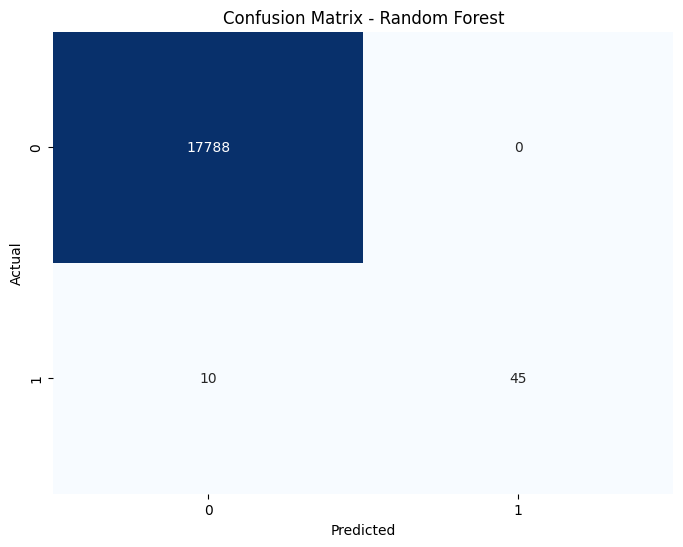

In [19]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
# Save the model
joblib.dump(clf_rf, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']